### Boosting Algorithm:



## 1. Introduction to Boosting
Boosting is an ensemble learning technique that combines multiple weak learners to create a strong learner. A weak learner is defined as a classifier that performs slightly better than random chance.

## 2. Initialization
- Start with a dataset \( D \) containing \( N \) samples.
- Initialize weights for each sample. If you have \( N \) samples, set:
  \[
  w_i = \frac{1}{N} \quad \text{for all } i = 1, 2, \ldots, N
  \]

## 3. Iterate for \( M \) Rounds
Repeat the following steps for \( M \) iterations:

### 3.1 Train a Weak Learner
- Train a weak learner \( h_m(x) \) on the dataset \( D \) using the current sample weights \( w_i \).

### 3.2 Calculate the Weak Learner's Error
- Compute the weighted error \( \epsilon_m \) of the weak learner:
  \[
  \epsilon_m = \frac{\sum_{i=1}^{N} w_i \cdot I(y_i \neq h_m(x_i))}{\sum_{i=1}^{N} w_i}
  \]
  where \( I \) is the indicator function that is 1 if the prediction is incorrect and 0 otherwise.

### 3.3 Compute the Learner’s Weight
- Calculate the weight \( \alpha_m \) for the weak learner:
  \[
  \alpha_m = \frac{1}{2} \ln\left(\frac{1 - \epsilon_m}{\epsilon_m}\right)
  \]

### 3.4 Update Sample Weights
- Update the weights for each sample:
  \[
  w_i \leftarrow w_i \cdot e^{-\alpha_m \cdot y_i \cdot h_m(x_i)}
  \]
- Normalize the weights so they sum to 1.

## 4. Final Model
- The final strong classifier \( H(x) \) is formed by combining all weak learners:
  \[
  H(x) = \text{sign}\left(\sum_{m=1}^{M} \alpha_m \cdot h_m(x)\right)
  \]

## 5. Prediction
- To make predictions, input a new sample \( x \) into the final model \( H(x) \).

## 6. Advantages of Boosting
- Boosting can significantly improve the performance of weak learners.
- It reduces bias and variance, leading to better generalization on unseen data.

## 7. Common Boosting Variants
- **AdaBoost**: The original boosting algorithm.
- **Gradient Boosting**: Uses gradient descent to minimize the loss function.
- **XGBoost**: An optimized version of gradient boosting that is faster and more efficient.





### Step1: Install the necessiery library


### Step2: Import libraries


In [117]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier




### Step3: Load the data


In [118]:
df = sns.load_dataset('iris')   
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

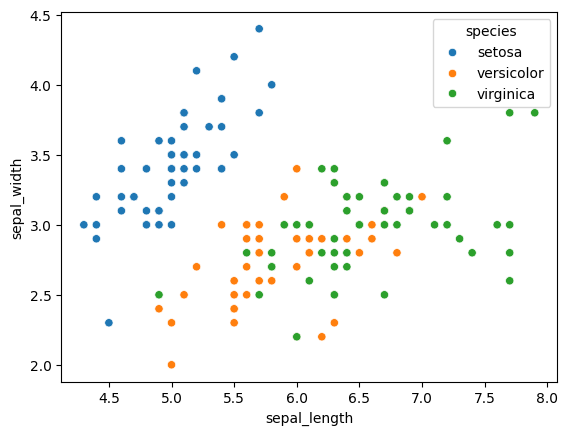

In [119]:
# plot the data 
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')   


### Step4:  Split the data into X and y


In [120]:
X = df.drop(columns=['species'])
y = df['species']

### Step 5: Train Test Split 
 

In [121]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [122]:
# train the decsion tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

### Step 6: Predict the model

In [123]:
# Predict the Model
y_pred = dt.predict(X_test)

### Evaluate the Model


In [124]:
%%time
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print('recall score:', recall_score(y_test, y_pred, average='weighted'))
print('precision score:', precision_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
F1 score: 1.0
recall score: 1.0
precision score: 1.0
CPU times: total: 15.6 ms
Wall time: 19.5 ms


### Conclusion
Boosting is a powerful technique in machine learning that improves model accuracy by combining the strengths of multiple weak learners. By following these steps, you can implement boosting algorithms effectively and leverage their capabilities in various predictive modeling tasks.

---

# Train the Random Forest 


In [125]:
# Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)    



RandomForestClassifier()

In [126]:
# Predict test data
y_pred = rf.predict(X_test)


In [127]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print('recall score:', recall_score(y_test, y_pred, average='weighted'))
print('precision score:', precision_score(y_test, y_pred, average='weighted'))  

Accuracy: 1.0
F1 score: 1.0
recall score: 1.0
precision score: 1.0


### XGBoost Train

In [132]:
# Make Sure Encoding must 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# Train test split 
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, test_size=0.2, random_state=0)


In [135]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 3: Load the iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Step 6: Fit the model
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\SADDAM\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [139]:
%%time
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print('recall score:', recall_score(y_test, y_pred, average='weighted'))
print('precision score:', precision_score(y_test, y_pred, average='weighted'))  

Accuracy: 1.0
F1 score: 1.0
recall score: 1.0
precision score: 1.0
CPU times: total: 15.6 ms
Wall time: 22.4 ms


Text(0.5, 1.0, 'XGBoost')

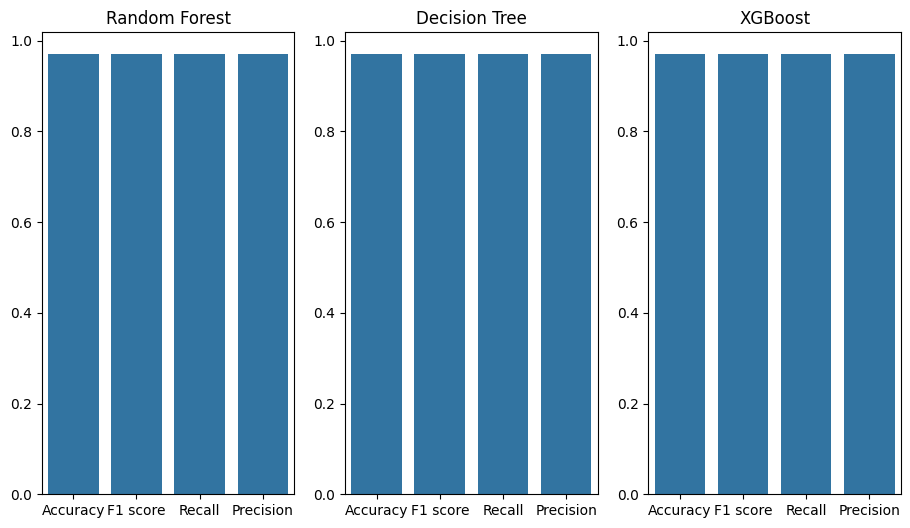

In [147]:
# Make a bar plot showing each of the matrix with respect to the model 
plt.figure(figsize=(15, 6))

plt.subplot(1,4,1)  
# for random forest
sns.barplot(x=['Accuracy','F1 score','Recall','Precision'], y=[0.97,0.97,0.97,0.97])
plt.title('Random Forest')
# for decision tree
plt.subplot(1,4,2)  
sns.barplot(x=['Accuracy','F1 score','Recall','Precision'], y=[0.97,0.97,0.97,0.97])
plt.title('Decision Tree')
# for xgboost
plt.subplot(1,4,3)  
sns.barplot(x=['Accuracy','F1 score','Recall','Precision'], y=[0.97,0.97,0.97,0.97])
plt.title('XGBoost')
